In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
def load_myCat_as_dataframe(catname):
    foldername = (catname)
    filenames = glob.glob('{}/*.jpg'.format(foldername))
    
    images = []

    for filename in filenames:
        img = cv2.imread(filename,0)

        #reshape image
        r = 100.0 / img.shape[1]
        dim = (100, int(img.shape[0] * r))
        resized_img = cv2.resize(img, dim).reshape(1,-1)
        images.append(pd.DataFrame(resized_img))
    
    return pd.concat(images).reset_index(drop=True)

In [3]:
claudia = load_myCat_as_dataframe('Claudia')
claudia['label'] = 0

In [4]:
lucy = load_myCat_as_dataframe('Lucy')
lucy['label'] = 1

In [5]:
dataset = pd.concat([claudia,lucy]).sample(frac=1).reset_index(drop=True)

In [6]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13291,13292,13293,13294,13295,13296,13297,13298,13299,label
0,0,1,1,1,1,1,1,1,2,1,...,199,203,204,198,200,203,199,194,191,0
1,118,123,119,118,121,121,119,125,126,147,...,159,165,174,165,144,164,179,178,177,1
2,147,74,104,166,209,226,182,111,217,222,...,232,232,234,239,231,237,239,232,231,1
3,178,177,171,172,174,171,161,161,158,159,...,11,11,13,19,19,13,21,13,7,0
4,183,184,189,182,180,180,179,182,179,179,...,32,32,35,35,32,42,38,33,33,0
5,178,120,173,157,161,127,151,155,167,126,...,150,150,150,151,175,172,172,157,143,1
6,8,11,10,10,14,2,11,7,12,10,...,174,174,173,176,172,171,170,176,177,0
7,75,73,83,108,155,173,157,169,179,184,...,8,10,14,11,11,15,21,29,90,0
8,176,179,134,140,115,144,178,174,172,190,...,126,124,126,124,125,126,124,126,129,1
9,76,73,52,54,49,48,54,42,48,54,...,66,66,66,70,73,73,69,72,66,1


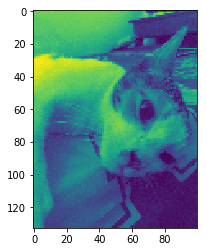

In [7]:
plt.imshow(dataset.iloc[10,:-1].values.reshape(133,100))

In [8]:
dataset.to_csv('dataset.csv', index=False)